In [2]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import clip, PCAreduce, plotSpectrum

In [1]:
imgBruiseCube12h = sp.open_image("../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr")
imgBruiseCube48h = sp.open_image("../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr")
imgHealthyCube = sp.open_image("../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr")

N,M,bands = imgBruiseCube12h.shape


imgBruiseCube12h = imgBruiseCube12h.read_subregion([4600, imgBruiseCube12h.shape[0]], [0, imgBruiseCube12h.shape[1]])
imgBruiseCube48h  = imgBruiseCube48h.read_subregion([4520, imgBruiseCube48h.shape[0]], [0, imgBruiseCube48h.shape[1]])
imgHealthyCube  = imgHealthyCube.read_subregion([4800, 5624], [0, imgHealthyCube.shape[1]])


clip(imgBruiseCube12h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgBruiseCube48h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgHealthyCube, 0, 1)
print("done")

NameError: name 'sp' is not defined

In [ ]:
imgCube8bit0h = (imgHealthyCube*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit0h[:,:,185])
res0h = np.hstack((imgCube8bit0h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res0h, figsize=(15,10))

imgCube8bit12h = (imgBruiseCube12h*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit12h[:,:,185])
res12h = np.hstack((imgCube8bit12h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res12h, figsize=(15,10))

imgCube8bit48h = (imgBruiseCube48h*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit48h[:,:,185])
res48h = np.hstack((imgCube8bit48h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res48h, figsize=(15,10))

In [ ]:
img12_PCA, eigenvalues1 = PCAreduce(imgBruiseCube12h, frac=0.99)
img48_PCA, eigenvalues2 = PCAreduce(imgBruiseCube48h, frac=0.99)
img1_PCA,  eigenvalues3 = PCAreduce(imgHealthyCube,   frac=0.99)

In [ ]:
img12_PCA_scaled = (img12_PCA - np.amin(img12_PCA)) / (np.amax(img12_PCA) - np.amin(img12_PCA))
img48_PCA_scaled  = (img48_PCA - np.amin(img48_PCA)) / (np.amax(img48_PCA) - np.amin(img48_PCA))
img1_PCA_scaled  = (img1_PCA - np.amin(img1_PCA)) / (np.amax(img1_PCA) - np.amin(img1_PCA))

img12_PCA_scaled[:,:,0] = img12_PCA_scaled[:,:,0]*(-1)
img48_PCA_scaled[:,:,0] = img48_PCA_scaled[:,:,0]*(-1)

sp.imshow(img48_PCA_scaled[:,:,0], figsize=(10,10))


In [ ]:

k = 7

class_map12, centers = sp.kmeans(img12_PCA_scaled,max_iterations=60, nclusters=k)

view = sp.imshow(img12_PCA_scaled[:,:,0], classes=class_map12, title="img12_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

clusters = []
class_map48, centers = sp.kmeans(img48_PCA_scaled, max_iterations=60, nclusters=k, frames=clusters)

view = sp.imshow(img48_PCA_scaled[:,:,0], classes=class_map48, title="img48_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data


#sp.imshow(imgCube, [20,80,150], stretch=((0.02, 0.98), (0.02, 0.98), (0.02, 0.98))) rgb

In [ ]:
temp = np.array(clusters)[0]
sp.imshow(temp)
temp[temp != 1] = 0
sp.imshow(temp)


In [ ]:
#print(np.array(centers).shape)
#for c in centers:
#    plt.plot(c)
#plt.figure()
class_map, centers = sp.kmeans(img1_PCA_scaled, nclusters=k)
view = sp.imshow(img1_PCA_scaled[:,:,0],stretch=0.01, classes=class_map)
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

In [ ]:
spectra = np.zeros([1,bands])
spectra[0] = np.array(imgBruiseCube48h[450,1400])
#spectra[1] = np.array(imgHealthyCube[410,210])

angles = sp.spectral_angles(imgBruiseCube48h, spectra)[:,:,0]
print(angles.shape)

plt.imshow(angles, cmap="gray")
plt.figure()
angles[angles > np.pi / 70] = 0

plt.imshow(angles, cmap="gray")
plt.figure()

In [3]:
files = [ "../Strawberry/Normalised/STR_B1_before-hit_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T184054_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_30min_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T193019_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_1hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T202126_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_3hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T214153_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_24h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T181621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr"
        ]
def meanSpectrum(cube):
    bands = cube.shape[2]
    avgSpec = np.zeros(bands)    
    for i in range(bands):
        avgSpec[i] = cube[:,:,i].mean()
    return avgSpec




kSize = 9 # size of mean filter
names = np.array(["before-hit", "0m","30m","1h" ,"3h","12h", "24h", "48h"])

# number 1,2,3.. represent each a single unique strawberry ID, see strawberry_labeled.png for starwberry IDs

healthySamples = {1: [[5383,1293], [5236,1270], [5202,1350], [5339,1283], [5317,1248],[5043,1168],[4955,1293], [4917,1251]],
                  2: [[5497,516], [5290,536], [5268,611], [5397, 542], [5375,513], [5117,423], [5042,517], [5008,473]]
                 }

bruisedSamples = {1: [[5392,1460],[5314,1462],[5288,1543],[5428,1474],[5409,1441],[5134,1353],[5036,1474],[4988,1440]],
                  2: [[5478,306], [5268,327], [5238,385], [5374,333], [5348,303], [5090, 216], [5010,309], [4976,273]],
                  4: [[4310,360], [4085,350], [4069,418] ,[4182,371], [4147,341], [3874,260], [3776,357], [3730,326]],
                  7: [[3069,1424], [2794,1452], [2763,1503], [2900,1469], [2877,1447], [2621,1310], [2540,1419], [2504,1366]],
                  9: [[1827,1299], [1585,1374], [1556,1423], [1694,1422], [1667,1401], [1411,1265], [1321,1375], [1277,1300]]
                 }


In [ ]:
library_nonbruise = []
for i in range(len(names)):
    subregion = sp.open_image(files[i]).read_subregion((pixel_h2[i][0] - kSize//2, pixel_h2[i][0] + kSize//2 +1), 
                                                      (pixel_h2[i][1] - kSize//2, pixel_h2[i][1] + kSize//2 +1))
    library_nonbruise.append([meanSpectrum(subregion), names[i]]) 

for spec in library_nonbruise:
    plotSpectrum(spec[0], xaxis="wavelength", linelabel=spec[1])
    

plt.title('Mean healthy area over time')
#plt.savefig("spectralLibary_healthy_region.png")
plt.figure()


In [ ]:

for sid in bruisedSamples.keys():
    library_bruise = []
    #sid = 2 # strawberry ID

    for i in range(len(names)):
        subregion = sp.open_image(files[i]).read_subregion((bruisedSamples[sid][i][0] - kSize//2, bruisedSamples[sid][i][0] + kSize//2 +1), 
                                                           (bruisedSamples[sid][i][1] - kSize//2, bruisedSamples[sid][i][1] + kSize//2 +1))
        library_bruise.append([meanSpectrum(subregion), names[i]]) 


    for spec in library_bruise:
        plotSpectrum(spec[0], xaxis="band", linelabel=spec[1])
    plt.title('Mean bruised area on strawberry %d' %sid)
    #plt.savefig("spectralLibary_bruise_region.png")
    plt.figure()


<Figure size 432x288 with 0 Axes>

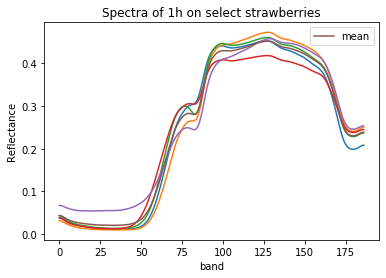

<Figure size 432x288 with 0 Axes>

In [39]:
spectrums = []
library_bruise = []
#sid = 1 # strawberry ID

i = 3 # 1,2,3,4 corrosponding to each of the time samples, Asending timer order
for sid in bruisedSamples.keys():
    
    subregion = sp.open_image(files[i]).read_subregion((bruisedSamples[sid][i][0] - kSize//2, bruisedSamples[sid][i][0] + kSize//2 +1), 
                                                       (bruisedSamples[sid][i][1] - kSize//2, bruisedSamples[sid][i][1] + kSize//2 +1))
    library_bruise.append(meanSpectrum(subregion)) 
    


for spec in library_bruise:
    plotSpectrum(spec, xaxis="band")
plt.title('Spectra of %s on select strawberries' % names[i] )
#plt.savefig("spectralLibary_bruise_region.png")
#plt.figure()


plotSpectrum(np.array(library_bruise).mean(axis=0), xaxis="band",linelabel = "mean" )
#plt.savefig("spectralLibary_bruise_region.png")
plt.figure()

